# Histograms, Binnings, and Density

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

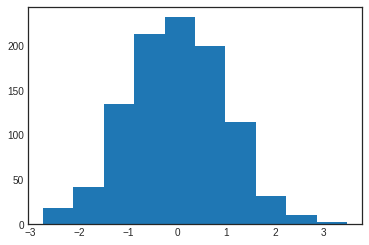

In [2]:
plt.hist(data);

- ``hist()`` options:

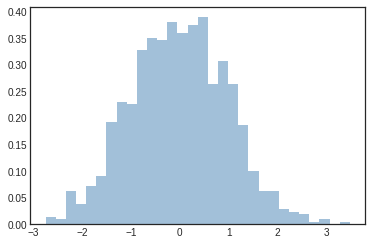

In [4]:
plt.hist(data, bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue', edgecolor='none');

- This combination of ``histtype='stepfilled'`` with transparency ``alpha`` to be very useful when comparing histograms of several distributions:

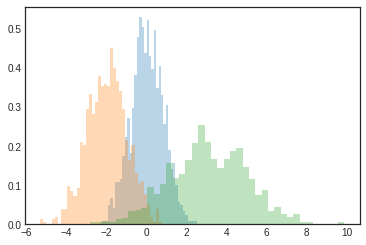

In [5]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

- To simply compute the histogram (count the number of points per bin and not display it), the ``np.histogram()`` function is available:

In [6]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 60 348 432 147  13]


### Two-Dimensional Histograms and Binnings

- We can also create 2D histograms by dividing points among 2D bins.
- Start by defining an ``x`` and ``y`` array drawn from a multivariate Gaussian distribution:

In [7]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

- One method uses Matplotlib's ``plt.hist2d`` function:

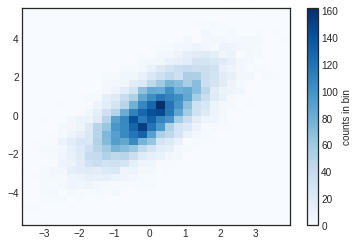

In [8]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

- ``plt.hist2d`` has a data-only counterpart in ``np.histogram2d``.

In [13]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
counts[0,:10]

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

- If you need histogram binning in more than two dimensions see the ``np.histogramdd`` function.

### Hexagonal binnings

- A 2D histogram creates a tesselation of squares across the axes. Another natural shape for such a tesselation is the regular hexagon.
- Matplotlib provides the ``plt.hexbin`` routine, which represents a 2D dataset binned within a grid of hexagons:
- ``plt.hexbin`` has a number of options, including the ability to specify weights for each point, and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc.).

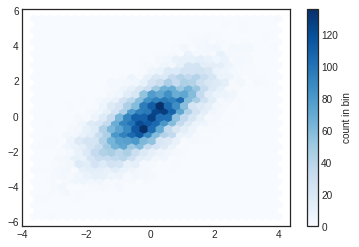

In [15]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

### Kernel density estimation

- Another common method of evaluating densities in multiple dimensions is *kernel density estimation* (KDE).
- KDE can be described as a way to "smear out" the points in space and add up the result to obtain a smooth function.
- One extremely quick and simple KDE implementation exists in the ``scipy.stats`` package.

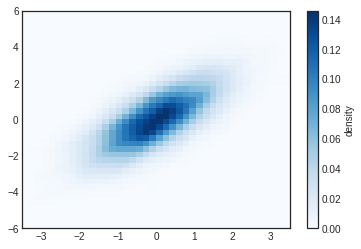

In [16]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

- KDE has a smoothing length that slides the knob between detail and smoothness (a.k.a. bias–variance trade-off). ``gaussian_kde`` uses a rule-of-thumb to find an optimal smoothing length for the input data.
- Other KDE implementations are available within SciPy. See ``sklearn.neighbors.KernelDensity`` and ``statsmodels.nonparametric.kernel_density.KDEMultivariate``.
- Seaborn provides a more compact API for creating KDE-based visualizations.